In [2]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt

from IPython.display import Audio
from torchaudio.utils import download_asset
from transforms import TimeShiftValue, TimeShiftRange

In [3]:
waveform, sample_rate = torchaudio.load('data/TAU-urban-acoustic-scenes-2022-mobile-development/audio/airport-barcelona-0-2-4-s5.wav')
#Resample to 44100
transform = T.Resample(orig_freq=sample_rate, new_freq=44100)
transformed = transform(waveform)

print(transformed)

tensor([[ 0.0214,  0.0266,  0.0314,  ..., -0.0004, -0.0028, -0.0059]])


In [4]:
waveform3, sample_rate3 = torchaudio.load('data/TAU-urban-acoustic-scenes-2022-mobile-development/audio/airport-barcelona-0-2-4-s5.wav') 
sample_noise = download_asset("tutorial-assets/Lab41-SRI-VOiCES-rm1-babb-mc01-stu-clo-8000hz.wav")

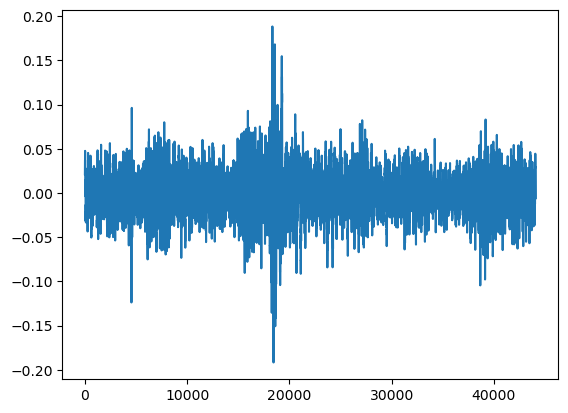

In [5]:
#PLot
plt.plot(waveform.t().numpy())
plt.show()

In [6]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)

In [7]:
noise, n_sample_rate = torchaudio.load(sample_noise)

# Trim the noise to match the length of the waveform
noise = noise[:, :waveform.shape[1]]

# If the noise is shorter than the waveform, repeat it
if noise.shape[1] < waveform.shape[1]:
    num_repeats = waveform.shape[1] // noise.shape[1]
    remainder = waveform.shape[1] % noise.shape[1]
    noise = torch.cat([noise] * num_repeats, dim=1)
    noise = torch.cat([noise, noise[:, :remainder]], dim=1)



snr_dbs = torch.tensor([20, 10, 3])
noisy_speeches = F.add_noise(waveform, noise, snr_dbs)

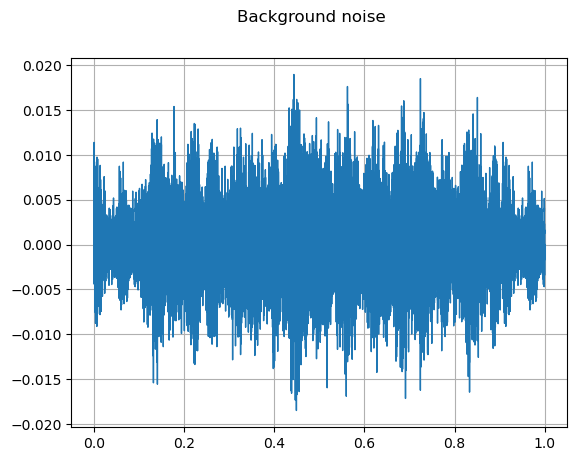

In [8]:
plot_waveform(noise, sample_rate, title="Background noise")

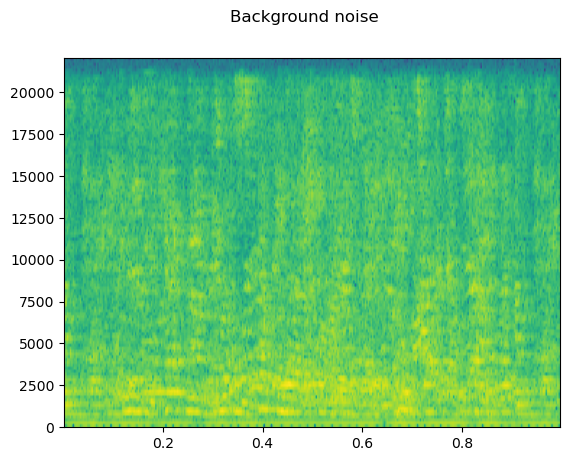

In [9]:
plot_specgram(noise, sample_rate, title="Background noise")

In [11]:
Audio(waveform, rate=sample_rate)

In [10]:
Audio(noisy_speeches, rate=sample_rate)

tensor([[ 0.0000e+00,  6.0206e-07,  1.4228e-06,  ..., -4.2723e-04,
         -2.8077e-03, -5.8595e-03]])


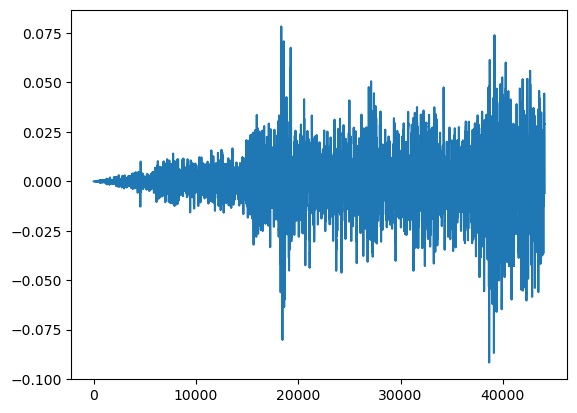

In [17]:
transform = T.Fade(fade_in_len=sample_rate, fade_shape='linear')
faded = transform(waveform)
print(faded)
plt.plot(faded.t().numpy())
plt.show()
Audio(transformed, rate=sample_rate)


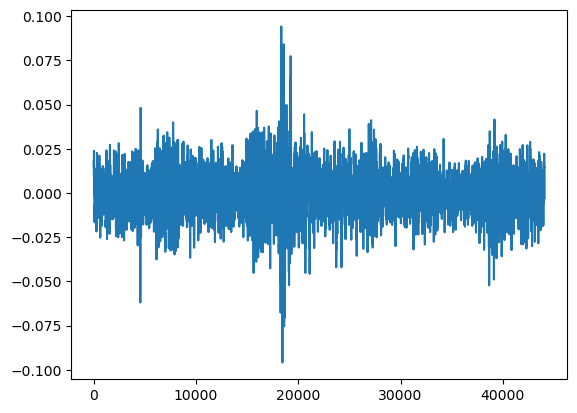

In [18]:
transform = T.Vol(gain=0.5)
transformed = transform(waveform)
plt.plot(transformed.t().numpy())
plt.show()
Audio(transformed, rate=sample_rate)

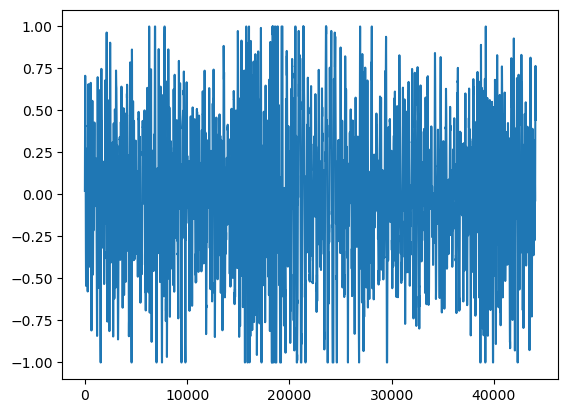

In [16]:
transform = T.Deemphasis()
transformed = transform(waveform)
plt.plot(transformed.t().numpy())
plt.show()
Audio(transformed, rate=sample_rate)

In [15]:
#Test TimeShiftRange with waveform
transform = TimeShiftRange(sample_rate=sample_rate, max_shift=5)
transformed = transform(waveform)
plt.plot(waveform.t().numpy())
plt.plot(transformed.t().numpy())

TypeError: forward() missing 2 required positional arguments: 'noise' and 'snr'